# Datascience project: Analising Brazilian Population, GDP and Murder Rates from 2002 to 2016

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dfpib1 = pd.read_excel("datasets/PIB dos Municípios - base de dados 2002-2009.xls")
dfpib2 = pd.read_excel('datasets/PIB dos Municípios - base de dados 2010-2017.xls')
dfhomi = pd.read_csv('datasets/homicidios.csv', sep=';')
dfhomi = dfhomi.rename(columns={'valor':'homicidios'})
dfpib2 = dfpib2[dfpib2.columns.values[:-3]]

## Joining Murder rates and income datasets

In [5]:
df = pd.concat([dfpib1,dfpib2])

df = df.rename(columns={'Ano':'período', 'Código do Município':'cod'})
df = df[df['período']<2017]
# df = df.join(dfhomi.set_index('cod'), on='Código do Município')
df = pd.merge(df,dfhomi,how='left', on=['período', 'cod'])
df.head()

,período,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Agropecuária, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto da Indústria,\na preços correntes\n(R$ 1.000)","Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",nome,homicidios
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,NaN,1102,...,27013.223,9376.871,24651.113,42700.523,103741.729,7549.266,111290.995,4047.83,Alta Floresta D'Oeste,36.714763
1,2002,1,Norte,11,RO,Rondônia,1100023,Ariquemes,NaN,1102,...,28590.178,99922.936,161851.549,116562.182,406926.845,42665.972,449592.816,5667.37,Ariquemes,58.944887
2,2002,1,Norte,11,RO,Rondônia,1100031,Cabixi,NaN,1102,...,10883.801,1961.907,5128.876,11925.001,29899.585,1867.935,31767.520,4246.99,Cabixi,0.000000
3,2002,1,Norte,11,RO,Rondônia,1100049,Cacoal,NaN,1102,...,32810.376,98292.764,175748.703,117968.303,424820.146,49622.951,474443.097,6353.27,Cacoal,41.677310
4,2002,1,Norte,11,RO,Rondônia,1100056,Cerejeiras,NaN,1102,...,11283.793,6651.475,25306.009,27731.366,70972.643,8200.971,79173.614,4442.47,Cerejeiras,16.736402


In [6]:
# dftest = df[[df.columns.values[0],df.columns.values[6],df.columns.values[-4]]]
# dftest=dftest.rename(columns={'Ano':'período', 'Código do Município':'cod'})
# dftest.columns[1] = 'bb'#Ano Código d // cod, periodo
# dftest = pd.merge(dftest,dfhomi,how='left', on=['período', 'cod'])
# dftest[dftest['período']<2017]

In [7]:
dfpib1[dfpib1['Código do Município']==2611606]
dfhomi[dfhomi['cod']==2611606].head()

,cod,nome,período,homicidios
1431,2611606,Recife,1996,53.044289
7085,2611606,Recife,1997,73.565852
12578,2611606,Recife,1998,81.504120
18005,2611606,Recife,1999,65.670745
23556,2611606,Recife,2000,69.082613


## Now dealing with the many population datasets

In [8]:
# as almost all of the following datasets require some minor tweaks in order to be correctly read, we will be reading one by one

#so, the codes are not strings, they are numbers, also without the zeroes, so we will need to fix this
# but first lets read all the datasets and make all their columns name the same

poplst = ['POP2016.xlsx','POP2015.xls','POP2014.xlsx', 'POP2013.xls', 'POP2012.xls','POP2011.xls','POP2009.xls',
          'POP2008.xls','POP2006.xls','POP2005.xls','POP2004.xls','POP2003.xls','POP2002.xls']
xls = pd.ExcelFile('datasets/pop/POP2016.xlsx')
df2016 = pd.read_excel(xls, 'Municípios', header =2)
df2016 = df2016[:5570]
df2016['período'] = 2016
xls = pd.ExcelFile('datasets/pop/POP2015.xls')
df2015 = pd.read_excel(xls, 'Municípios', header =2)
df2015 = df2015[:5570]
df2015['período'] = 2015
df2016.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2014.xls')
df2014 = pd.read_excel(xls, 'Municípios', header =2)
df2014 = df2014[:5570]
df2014['período'] =  2014
df2014.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2013.xls')
df2013 = pd.read_excel(xls, 'Municípios', header =1)
df2013 = df2013[:5568]
df2013['período'] =  2013
df2013.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2012.xls')
df2012 = pd.read_excel(xls, 'TAB_DOU_Municípios (internet)', header =2)
df2012 = df2012[:5565]
df2012['período'] =  2012
df2012.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2011.xls')
df2011 = pd.read_excel(xls, 'MUNICÍPIOS', header =2)
df2011 = df2011[0:5565]
df2011['período'] =  2011
df2011.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2009.xls')
df2009 = pd.read_excel(xls, 'MUNICÍPIOS', header =4)
df2009 = df2009[0:5565]
df2009['período'] =  2009
df2009.columns = df2015.columns

xls = pd.ExcelFile('datasets/pop/POP2008.xls')
df2008 = pd.read_excel(xls, 'POP08DOU', header =4)
df2008 = df2008[0:5565]
df2008['período'] =  2008
df2008.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2006.xls')
df2006 = pd.read_excel(xls, 'P5564TCU', header =4)
df2006 = df2006[0:5565]
df2006['período'] =  2006
df2006.columns = df2015.columns
xls = pd.ExcelFile('datasets/pop/POP2005.xls')
df2005 = pd.read_excel(xls, 'POP05DOU', header =4)
df2005 = df2005[0:5564]
df2005['período'] =  2005
df2005.columns = df2015.columns
# xls = pd.ExcelFile()
df2004 = pd.read_excel('datasets/pop/POP2004.xls', header =4)
df2004 = df2004[0:5564]
df2004['período'] =  2004
df2004.columns = df2015.columns

df2003 = pd.read_excel('datasets/pop/POP2003.xls', header =4)
df2003 = df2003[0:5564]
df2003['período'] =  2003
df2003.columns = df2015.columns

df2002 = pd.read_excel('datasets/pop/POP2002.xls', header =5)
df2002 = df2002[0:5560]
df2002['período'] =  2002
df2002.columns = df2015.columns
#names=['SIGLA', 'CODIGOESTADO', 'CODIGO MUN', 'NOME', 'POP']

dfpop = pd.concat([df2016, df2015,df2014,df2013,df2012,df2011,df2009,df2008,df2006,df2005,df2004,df2003,df2002])
#df2 = pd.read_excel(xls, 'Sheet2')

In [9]:
dfpop['test'] = dfpop['COD. MUNIC'].isnull()
dfpop = dfpop.dropna()
dfpop[dfpop['test']==True]
dfpop['COD. MUNIC'] = dfpop['COD. MUNIC'].astype(int)
dfpop['cod'] = dfpop['COD. UF']*100000 + dfpop['COD. MUNIC']
dfpop['cod'] = dfpop['cod'].astype(int)
dfpop

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,período,test,cod
0,RO,11,15,Alta Floresta D'Oeste,25506,2016,False,1100015
1,RO,11,23,Ariquemes,105896,2016,False,1100023
2,RO,11,31,Cabixi,6289,2016,False,1100031
3,RO,11,49,Cacoal,87877,2016,False,1100049
4,RO,11,56,Cerejeiras,17959,2016,False,1100056
...,...,...,...,...,...,...,...,...
5555,GO,52,2200,Vianópolis,11770,2002,False,5202200
5556,GO,52,2205,Vicentinópolis,6179,2002,False,5202205
5557,GO,52,2220,Vila Boa,3381,2002,False,5202220
5558,GO,52,2230,Vila Propício,4637,2002,False,5202230


## Some cities have multiples city codes, so we needed to fix it, this is the best solution that I was able to find:

In [ ]:
def fix_cod(df1):
    df1['cod'] = df1['cod'].unique().max()
    return df1

grouped = dfpop.groupby(['NOME DO MUNICÍPIO','COD. UF'])
dataframes = [group for _, group in grouped]
aux = list(map(fix_cod,dataframes))
aux = pd.concat(aux)


## The following two cells were previous attempts at dealing with this problem, no not uncomment them

In [17]:
# i=0
# for group, df1 in dfpop.groupby(['NOME DO MUNICÍPIO','COD. UF']):
#     # print(group)
#     if(i==0):
#         #a primeiraentrada, precisa corrigir mesmo assim
#         # print(group)
#         df1['cod'] = df1['cod'].unique().max()
#         aux = df1
#         i = 1
#     else:
#         df1['cod'] = df1['cod'].unique().max()
#         aux = pd.concat([aux,df1])

In [18]:
# grouped = dfpop.groupby(['NOME DO MUNICÍPIO','COD. UF'])
# mx = grouped['cod'].unique().map(max)
# mn = grouped['cod'].unique().map(max)
# mx = mx.values
# mn = mn.values
# dfpop = dfpop.replace(mn,mx)

In [43]:
#testing if everything is fine
aux[aux['NOME DO MUNICÍPIO']=='Áurea']

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA,período,test,cod
4634,RS,43,1552,Áurea,3725,2016,False,4301552
4635,RS,43,1552,Áurea,3732,2015,False,4301552
4635,RS,43,1552,Áurea,3740,2014,False,4301552
4635,RS,43,1552,Áurea,3748,2013,False,4301552
4631,RS,43,1552,Áurea,3632,2012,False,4301552
4631,RS,43,1552,Áurea,3648,2011,False,4301552
4631,RS,43,1552,Áurea,3789,2009,False,4301552
4631,RS,43,1552,Áurea,3802,2008,False,4301552
4630,RS,43,155,Áurea,3723,2006,False,4301552
4630,RS,43,155,Áurea,3748,2005,False,4301552


## And now, the complete Dataset with murder rates, population and GDP for every brazilian city in the period between 2002 and 2016:

In [45]:
df = pd.merge(df,aux[['período','cod','POPULAÇÃO ESTIMADA']],how='left', on=['período', 'cod'])
# df1['POPULAÇÃO ESTIMADA'] =df1['POPULAÇÃO ESTIMADA'].astype(int) 

## Lets check if there are some missing values in the population

In [48]:
df['test'] =  df['POPULAÇÃO ESTIMADA'].isnull()
df[df['test']==True].head()

,período,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)","Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",nome,homicidios,POPULAÇÃO ESTIMADA,test
296,2002,1,Norte,16,AP,Amapá,1600154,Pedra Branca do Amapari,NaN,1602,...,2853.678,13260.075,19328.621,1557.331,20885.952,4405.39,Pedra Branca do Amapari,0.000000,NaN,True
889,2002,2,Nordeste,23,CE,Ceará,2300150,Acarape,NaN,2302,...,6220.917,11431.853,29104.954,2347.233,31452.187,2293.60,Acarape,44.434570,NaN,True
1208,2002,2,Nordeste,24,RN,Rio Grande do Norte,2412559,São Miguel do Gostoso,NaN,2404,...,2877.499,9984.044,15515.321,554.848,16070.170,1987.90,São Miguel do Gostoso,0.000000,NaN,True
1865,2002,2,Nordeste,29,BA,Bahia,2903300,Barro Preto,NaN,2907,...,2701.940,6810.342,12178.508,491.470,12669.979,1576.06,Barro Preto,12.223445,NaN,True
2602,2002,3,Sudeste,31,MG,Minas Gerais,3131802,Itabirinha,NaN,3108,...,6409.129,8632.057,19122.393,1066.829,20189.222,2082.65,Itabirinha,30.848329,NaN,True


## Well, we need to fix this, lets try with interpolation
(there is room for improvement)

In [125]:
dftest = df.sort_values(['cod', 'período']).ffill().bfill()
dftest = dftest.reset_index(drop=True)

# dftest[]
# dftest = df.sort_values(['cod', 'período'])
# dftest['POPULAÇÃO ESTIMADA'] = dftest['POPULAÇÃO ESTIMADA'].interpolate(method='linear', axis=0)#ffill().bfill()


## Fixing some values in population

In [126]:
def auxfunc(a):
    result = False
    if(isinstance(a,int) == True):
        result = True
    elif(isinstance(a,float) == True):
        result = True
    return result
def clean(a):
    return a.replace('.','').replace('(*)', '').replace('(1)', '').replace('(2)', '').replace('*', '')
    

dftest['test1'] = dftest['POPULAÇÃO ESTIMADA'].map(auxfunc)
replaced = dftest[dftest['test1']==False]['POPULAÇÃO ESTIMADA'].values
replaceby = dftest[dftest['test1']==False]['POPULAÇÃO ESTIMADA'].map(clean).map(int)
dftest['POPULAÇÃO ESTIMADA'].replace(replaced, replaceby, inplace=True)
dftest['POPULAÇÃO ESTIMADA'] = dftest['POPULAÇÃO ESTIMADA'].astype(int)
dftest[dftest['test1']==False]['POPULAÇÃO ESTIMADA']


2635     17960
3160     41487
3161     11412
3162     41487
3163     41487
3164     41487
4346     59881
4347     59881
7143     61621
9228     25192
9903     32629
31313    36789
31958    25002
33188    17855
Name: POPULAÇÃO ESTIMADA, dtype: int64

## Now it is time for some visualizations

In [127]:
dftest

,período,Código da Grande Região,Nome da Grande Região,Código da Unidade da Federação,Sigla da Unidade da Federação,Nome da Unidade da Federação,cod,Nome do Município,Região Metropolitana,Código da Mesorregião,...,"Valor adicionado bruto da Administração, defesa, educação e saúde públicas e seguridade social, \na preços correntes\n(R$ 1.000)","Valor adicionado bruto total, \na preços correntes\n(R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto, \na preços correntes\n(R$ 1.000)","Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)",nome,homicidios,POPULAÇÃO ESTIMADA,test,test1
0,2002,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,4.270052e+04,1.037417e+05,7.549266e+03,1.112910e+05,4047.83,Alta Floresta D'Oeste,36.714763,27237,False,True
1,2003,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,4.595491e+04,1.327108e+05,1.051161e+04,1.432224e+05,5138.58,Alta Floresta D'Oeste,18.140260,27563,False,True
2,2004,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,5.130564e+04,1.617717e+05,1.221905e+04,1.739908e+05,5999.48,Alta Floresta D'Oeste,17.240785,29001,False,True
3,2005,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,5.969326e+04,1.541936e+05,1.293377e+04,1.671274e+05,5837.69,Alta Floresta D'Oeste,20.957770,28629,False,True
4,2006,1,Norte,11,RO,Rondônia,1100015,Alta Floresta D'Oeste,RM Porto Velho,1102,...,6.638332e+04,1.551363e+05,1.366880e+04,1.688051e+05,5819.86,Alta Floresta D'Oeste,20.686089,29005,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83471,2012,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,6.017942e+07,1.382618e+08,2.583951e+07,1.641013e+08,61959.36,Brasília,36.019954,2648532,False,True
83472,2013,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,6.678340e+07,1.508029e+08,2.510379e+07,1.759067e+08,63054.41,Brasília,30.002570,2648532,True,True
83473,2014,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,7.372586e+07,1.712018e+08,2.623029e+07,1.974321e+08,69216.80,Brasília,29.554350,2852372,False,True
83474,2015,5,Centro-oeste,53,DF,Distrito Federal,5300108,Brasília,RIDE - Região Integrada de Desenvolvimento do ...,5301,...,8.329459e+07,1.862941e+08,2.931881e+07,2.156129e+08,73970.99,Brasília,25.456030,2914830,False,True


In [186]:
grouped = dftest.groupby(['Nome da Grande Região','período'])
aux = grouped['POPULAÇÃO ESTIMADA'].sum()
aux = pd.DataFrame(aux).reset_index()
totals = aux.groupby('período').sum()
totals.head()


,POPULAÇÃO ESTIMADA
período,
2002,174561285
2003,176791834
2004,181473161
2005,184184264
2006,186770562


In [201]:
#we wanna show the population percentage and the gdp percentage over the years, has it changed?
#first lets do it for the population, for every year we need to create a new column that states the pop % of the region in regards to the total

def total(df):
    df['total'] = aux.groupby('período').sum().loc[df['período']].values[0]
    return df

grouped = dftest.groupby(['Nome da Grande Região','período'])
aux = grouped['POPULAÇÃO ESTIMADA'].sum()

aux = pd.DataFrame(aux).reset_index()
aux = aux.apply(total,axis=1)
aux['% pop'] = aux ['POPULAÇÃO ESTIMADA'] / aux['total']
aux[aux['período']==2002]
aux[aux['Nome da Grande Região']=='Nordeste']
# aux = aux.apply(total,axis=1).total
# aux
# aux = aux.apply()
# aux['total'] 
# aux.groupby('período').sum()
# aux

,Nome da Grande Região,período,POPULAÇÃO ESTIMADA,total,% pop
15,Nordeste,2002,48866573,174561285,0.279939
16,Nordeste,2003,49373442,176791834,0.279274
17,Nordeste,2004,50445419,181473161,0.277977
18,Nordeste,2005,51019091,184184264,0.277000
19,Nordeste,2006,51609027,186770562,0.276323
20,Nordeste,2007,51609027,186770562,0.276323
21,Nordeste,2008,53079998,189604313,0.279951
22,Nordeste,2009,53591197,191506729,0.279840
23,Nordeste,2010,53591197,191506729,0.279840
24,Nordeste,2011,53500965,192376496,0.278106


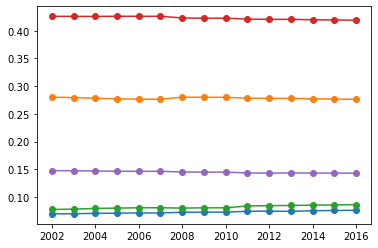

In [205]:
for region in aux['Nome da Grande Região'].unique():
    plt.plot(aux['período'].unique(),aux[aux['Nome da Grande Região']==region]['% pop'], marker='o')
    # aux[region,]
    # print (region)
plt.show()